In [1]:
import pickle
from astropy.table import Table
import astropy.coordinates as coord
import astropy.units as u
from gala.coordinates import reflex_correct

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import gala.coordinates as gc

In [3]:
import numpy as np
import scipy.stats


def getDust(G, bp, rp, ebv, maxnit=10):
    """ Compute the Gaia extinctions assuming relations from Babusieux
    Arguments: G, bp, rp, E(B-V)
    maxnit -- number of iterations
    Returns extinction in G,bp, rp
    Author: Sergey Koposov skoposov@cmu.edu
    """
    c1, c2, c3, c4, c5, c6, c7 = [0.9761, -0.1704,
                                  0.0086, 0.0011, -0.0438, 0.0013, 0.0099]
    d1, d2, d3, d4, d5, d6, d7 = [
        1.1517, -0.0871, -0.0333, 0.0173, -0.0230, 0.0006, 0.0043]
    e1, e2, e3, e4, e5, e6, e7 = [
        0.6104, -0.0170, -0.0026, -0.0017, -0.0078, 0.00005, 0.0006]
    A0 = 3.1*ebv
    P1 = np.poly1d([c1, c2, c3, c4][::-1])

    def F1(bprp): return np.poly1d(
        [c1, c2, c3, c4][::-1])(bprp)+c5*A0+c6*A0**2+c7*bprp*A0

    def F2(bprp): return np.poly1d(
        [d1, d2, d3, d4][::-1])(bprp)+d5*A0+d6*A0**2+d7*bprp*A0

    def F3(bprp): return np.poly1d(
        [e1, e2, e3, e4][::-1])(bprp)+e5*A0+e6*A0**2+e7*bprp*A0
    xind = np.isfinite(bp+rp+G)
    curbp = bp-rp
    for i in range(maxnit):
        AG = F1(curbp)*A0
        Abp = F2(curbp)*A0
        Arp = F3(curbp)*A0
        curbp1 = bp-rp-Abp+Arp

        delta = np.abs(curbp1-curbp)[xind]
        #print(scipy.stats.scoreatpercentile(delta[np.isfinite(delta)], 99))
        curbp = curbp1
    AG = F1(curbp)*A0
    Abp = F2(curbp)*A0
    Arp = F3(curbp)*A0
    return AG, Abp, Arp


In [4]:
def calc_distance(g, Ag):
    #Ag = 2.5*ebv
    gmag = g-Ag
    dist = 10.*10.**(0.2*(gmag-0.5))*1e-3
    return dist

In [5]:
savedir = '/Users/mwilde/Dropbox/RRLyraeGaiaSprint/'

In [6]:
with open(savedir+'gaiaRRlyrae.pkl', 'rb') as f:
    d = Table(pickle.load(f))


In [7]:
d.keys()

['ra',
 'dec',
 'pmra',
 'pmdec',
 'parallax',
 'parallax_error',
 'int_average_g',
 'int_average_g_error',
 'g_absorption',
 'g_absorption_error',
 'pmra_error',
 'pmdec_error',
 'pmra_pmdec_corr',
 'ebv',
 'peak_to_peak_g',
 'num_clean_epochs_g',
 'astrometric_excess_noise',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag',
 'g_transit_time',
 'g_transit_flux',
 'pf',
 'best_classification',
 'source_id']

In [8]:
Ag, Abp, Arp = getDust(d['int_average_g'], d['phot_bp_mean_mag'], d['phot_rp_mean_mag'], d['ebv'])

/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:680: RuntimeWarning: overflow encountered in multiply
  y = y * x + p[i]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in multiply
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in multiply
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in multiply
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in add
/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:680: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


In [9]:
bprp = (d['phot_bp_mean_mag'] - Abp) - (d['phot_rp_mean_mag'] - Arp)
distances = calc_distance(d['int_average_g'], Ag)
c = coord.SkyCoord(ra=d['ra']*u.deg, 
                   dec=d['dec']*u.deg, 
                  distance=distances*u.kpc)

cGal = c.transform_to(coord.Galactocentric)

In [10]:
cSag = c.transform_to(gc.Sagittarius)

/anaconda3/lib/python3.6/site-packages/astropy/coordinates/angles.py:646: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/anaconda3/lib/python3.6/site-packages/astropy/coordinates/angles.py:529: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/anaconda3/lib/python3.6/site-packages/astropy/coordinates/angles.py:529: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/anaconda3/lib/python3.6/site-packages/astropy/coordinates/angles.py:646: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):


In [11]:
cGalactic = c.transform_to(coord.Galactic)

/anaconda3/lib/python3.6/site-packages/astropy/coordinates/angles.py:646: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/anaconda3/lib/python3.6/site-packages/astropy/coordinates/angles.py:529: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/anaconda3/lib/python3.6/site-packages/astropy/coordinates/angles.py:529: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/anaconda3/lib/python3.6/site-packages/astropy/coordinates/angles.py:646: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):


In [12]:
import astropy

In [13]:
astropy.__version__

'3.0.3'

In [14]:
good = ~np.isnan(d['pmra']) & \
       ~np.isnan(d['pmdec']) & \
       (d['ebv'] < 5) & (bprp < 1) & (Ag < 5) & \
       (d['best_classification'] == 'RRab') & \
       (np.abs(cGal.z) > 1*u.kpc) & \
       (np.abs(cSag.Beta) > 10.*u.deg) & \
       (np.sqrt((cGalactic.l - 280.4652*u.deg)**2. + (cGalactic.b - -32.8884*u.deg)**2) > 15*u.deg) & \
       (np.sqrt((cGalactic.l - 302.8084*u.deg)**2  + (cGalactic.b - -44.3277*u.deg)**2) > 10*u.deg)


/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)
/anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in greater
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/anaconda3/lib/python3.6/site-packages/astropy/coordinates/angles.py:646: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/anaconda3/lib/python3.6/site-packages/astropy/coordinates/angles.py:646: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/anaconda3/lib/python3.6/site-packages/astropy/coordinates/angles.py:529: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/anaconda3/lib/python3.6/site-packages/a

In [15]:
data = d[good]

In [16]:
Ag, Abp, Arp = getDust(data['int_average_g'], data['phot_bp_mean_mag'], data['phot_rp_mean_mag'], data['ebv'])

In [17]:
bprp = (data['phot_bp_mean_mag'] - Abp) - (data['phot_rp_mean_mag'] - Arp)

In [18]:
distances = calc_distance(data['int_average_g'], Ag)
c = coord.SkyCoord(ra=data['ra']*u.deg, 
                   dec=data['dec']*u.deg, 
                   pm_ra_cosdec=data['pmra']*u.mas/u.yr,
                   pm_dec=data['pmdec']*u.mas/u.yr,
                   distance = distances*u.kpc, 
                   radial_velocity=0.*u.km/u.s)
cCorrect = reflex_correct(c)
cGal = cCorrect.transform_to(coord.Galactic)

In [19]:
cGalactic = cCorrect.transform_to(coord.Galactic)

In [20]:
cGalTable = Table()
cGalTable['l'] = cGalactic.l
cGalTable['b'] = cGalactic.b
cGalTable['pm_l_cosb'] = cGalactic.pm_l_cosb
cGalTable['pm_b'] = cGalactic.pm_b
cGalTable['distance'] = distances




In [21]:
cGalTable.write('rrlyraeDynamics.txt', format='ascii')

In [22]:
vl = (cGalactic.pm_l_cosb*cGalactic.distance).to(u.km/u.s, equivalencies=u.dimensionless_angles())
vb = (cGalactic.pm_b*cGalactic.distance).to(u.km/u.s, equivalencies=u.dimensionless_angles())


In [23]:
cGal.set_representation_cls('cartesian')

In [24]:
c.shape

(42483,)

Text(0.5,1,'distances')

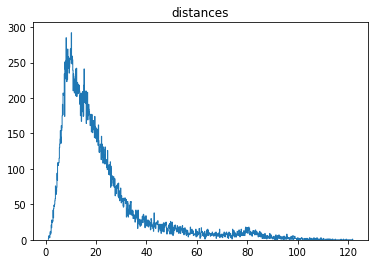

In [25]:
plt.hist(distances[~np.isnan(distances)], bins=1000, histtype='step')
plt.title('distances')

In [26]:
np.isnan(cGal.U).sum()
#for k in data.keys():
#    print(data[k][np.isnan(cGal.U)])
print(distances[np.isnan(cGal.U)], Ag[np.isnan(cGal.U)])

int_average_g
------------- ebv
---


In [27]:
locgalaxiesfile = '/Users/mwilde/Dropbox/data/Misc/NearbyGalaxies.dat'
locgaldata = Table.read(locgalaxiesfile, format='ascii')
gcfile = '/Users/mwilde/Dropbox/data/Misc/Harris-globclust.fits'
gcdata = Table.read(gcfile, format='fits')
locGalc = coord.SkyCoord(ra=locgaldata['RA'], dec=locgaldata['Dec'], unit=(u.hourangle, u.deg))
gcc     = coord.SkyCoord(ra=gcdata['ra'],     dec=gcdata['dec'], unit=(u.hourangle, u.deg))

locGalcGal = locGalc.transform_to(coord.Galactic)
gccGal = gcc.transform_to(coord.Galactic)

In [28]:
from sklearn.neighbors import KDTree as kdtree
import pandas as pd
import matplotlib as mpl

In [29]:
treedata = pd.DataFrame(data={'u':cGal.u/(1.*u.kpc), 
                              'v':cGal.v/(1.*u.kpc), 
                              'w':cGal.w/(1.*u.kpc),
                              'U':cGal.U/(10*u.km/u.s),
                              'V':cGal.V/(10*u.km/u.s), 
                              'W':cGal.W/(10*u.km/u.s)})

In [30]:
#treedataHigh = treedata.iloc[np.where(np.abs(cGalactic.b) >= 30.*u.deg)[0]]
#cGalacticHigh = cGalactic[np.abs(cGalactic.b) >= 30.*u.deg]

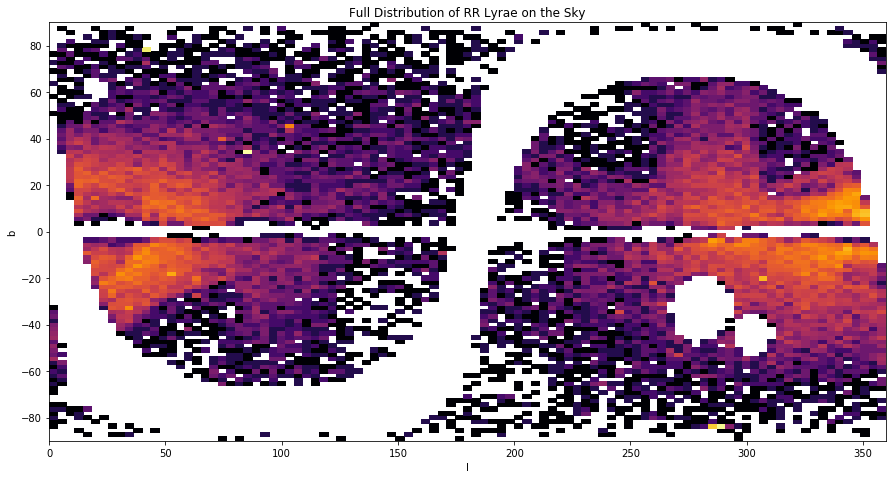

In [31]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'aspect': 'equal'})
nbins = 100
xbins = np.linspace(0, 360, nbins)
ybins = np.linspace(-90, 90, nbins)

H, xe, ye = np.histogram2d(cGalactic.l, cGalactic.b, bins=(xbins, ybins))
im = ax.pcolormesh(xe, ye, H.T,
      cmap='inferno', norm=mpl.colors.LogNorm())#, vmax=20) #, vmin=-100, vmax=100)
ax.set_title('Full Distribution of RR Lyrae on the Sky')
ax.set_xlabel('l')
ax.set_ylabel('b')
fig.savefig('rrlyraeDist.png', rasterized=True)

In [32]:
tree = kdtree(treedata)

In [33]:
radius = 3.0


In [34]:
(ind, dist) = tree.query_radius(treedata, radius, count_only = False, return_distance = True)

In [35]:
maxMembers= 2
minMembers = 2
clumps = []
for i in ind:
    if (len(i)>=minMembers) & (len(i)<=maxMembers): 
        clumps.append(i)
print(len(clumps))

7913


In [36]:
# for c in clumps:
# if len(c) > 2: print(len(c))

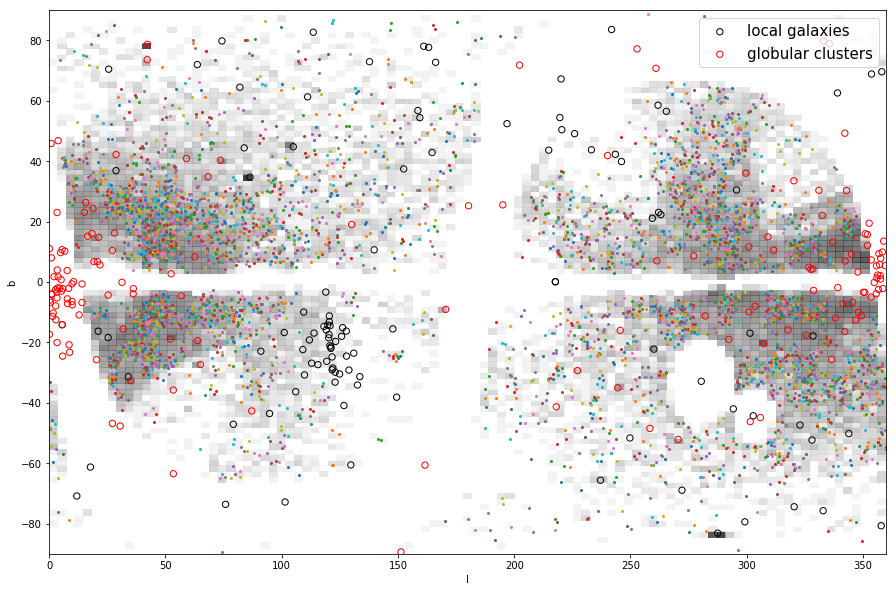

In [37]:
#clumpTable = Table()
clumpTable = pd.DataFrame(columns = ('indices', 'ra', 'dec', 'pmra', 'pmdec', 'distance', 'width', 'angularSizeR', 'l', 'b'))
#figAll, axAll = plt.subplots()
figSky, axSky = plt.subplots(figsize=(15, 10))
colors=iter(plt.cm.rainbow(np.linspace(0,1,len(clumps))))
axSky.pcolormesh(xe, ye, H.T, cmap='Greys', norm=mpl.colors.LogNorm(), alpha=0.75)
ti = 0
distToKnown = 5.0 #deg
widthOfClump = 1 # kpc
maxSameAsBefore = 1
for j in range(len(clumps)):
    #check that it's small in physical space
    small = treedata.iloc[clumps[j]]
    width = np.max((small.u - np.mean(small.u))**2 + (small.v - np.mean(small.v))**2 + (small.w - np.mean(small.w))**2) #kpc
    if width < widthOfClump :
        #check that it isn't something already known 
        co = cGalactic[clumps[j]]
        dist_known = np.zeros(len(co) + len(co))
        for ii, (ll, bb) in enumerate(zip(co.l, co.b)):
            dist_known[ii] = np.min(np.sqrt((ll - locGalcGal.l)**2 + (bb - locGalcGal.b)**2).value)
            dist_known[ii + len(co)] = np.min(np.sqrt((ll - gccGal.l)**2 + (bb - gccGal.b)**2).value)
        #print(np.min(dist_known))
        lmcdist = np.sqrt((ll.value - 280.4652)**2. + (bb.value - -32.8884)**2)
        smcdist = np.sqrt((ll.value - 302.8084)**2  + (bb.value - -44.3277)**2)
        if (np.min(dist_known) > distToKnown) & (lmcdist > 10) & (smcdist > 10): 
            #check that you haven't already plotted it 
            samesies = 0
            for k in range(j):
                same = np.in1d(clumps[j], clumps[k])
                #print(same, np.sum(same), j, k)
                samesies += np.sum(same)
            if (samesies < maxSameAsBefore+1):
                #color = next(colors)
                dnow= data[clumps[j]]
                clumpTable.loc[ti] = [clumps[j], dnow['ra'], dnow['dec'], dnow['pmra'], dnow['pmdec'], 
                                      distances[clumps[j]], width, np.max(width*u.kpc/cGalactic[clumps[j]].distance*180./np.pi), 
                                     np.median(cGalactic.l[clumps[j]]), np.median(cGalactic.b[clumps[j]])]
                ti += 1
                #print(samesies, clumps[j], dnow['ra'][0], dnow['dec'][0], width, np.max(width*u.kpc/cGalactic[clumps[j]].distance*180./np.pi))
                axSky.scatter(cGalactic.l[clumps[j]], cGalactic.b[clumps[j]], s=len(clumps[j])*2)#, c=color)
axSky.scatter(locGalcGal.l, locGalcGal.b, s=40, facecolor='none', edgecolor='black', label='local galaxies')
axSky.scatter(gccGal.l, gccGal.b, s=40, facecolor='none', edgecolor='red', label='globular clusters')
axSky.set_xlabel('l')
axSky.set_ylabel('b')
axSky.set_xlim(0, 360)
axSky.set_ylim(-90, 90)
axSky.legend(fontsize=15)
figSky.savefig('allsky_pairs.png')
#plt.close(fig)

In [38]:
len(clumpTable)

2268

In [39]:
clumpTable.to_pickle('clumpTablePairs')

In [40]:
print(np.sqrt(np.var(clumpTable.iloc[0]['pmra']))*4, np.sqrt(np.var(clumpTable.iloc[0]['pmdec']))*4)

1.2640583562484 1.0344539741401002


In [41]:
from os import path
import sqlutilpy as sqlutil
def queryDatabase(query, columns, post_query, cache_file='db.pickle', queryPro=None):

    #cache_file = "reducedPM2.pickle"

    if not path.exists(cache_file):
        if queryPro is not None:
            res = sqlutil.get(queryPro,
                          db='wsdb', host='cappc127.ast.cam.ac.uk', 
                          user='gaia_sprint', password='NOT@Gaia_sprint', 
                          asDict=True)
        else:
            res = sqlutil.get(query.format(','.join(columns), post_query),
                          db='wsdb', host='cappc127.ast.cam.ac.uk', 
                          user='gaia_sprint', password='NOT@Gaia_sprint', 
                          asDict=True)

        with open(cache_file, "wb") as f:
            pickle.dump(res, f)
        
    else:
        with open(cache_file, "rb") as f:
            res = pickle.load(f)
    return res

/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [42]:
from scipy.interpolate import interp1d
dataCMD_15 = Table.read('MIST_iso_5b18346c0ece6.iso.cmd', format='ascii.commented_header', header_start=12)
dataCMD_10 = Table.read('MIST_iso_5b19718e29c20.iso.cmd', format='ascii.commented_header', header_start=12)
dataCMD_05 = Table.read('MIST_iso_5b19717ee7821.iso.cmd', format='ascii.commented_header', header_start=12)
dataCMD_20 = Table.read('MIST_iso_5b1aa1d56d073.iso.cmd', format='ascii.commented_header', header_start=12)

-1.9285079449866906
-2.498738805154451
-2.864049043887721


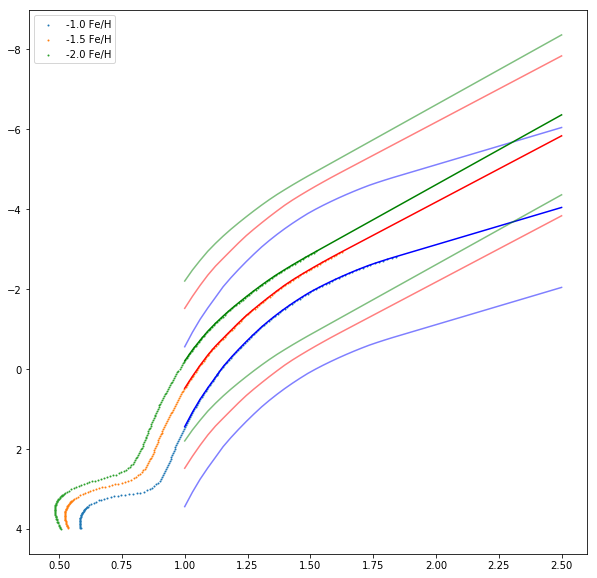

In [43]:
plt.figure(figsize=(10,10))
colors = ['blue', 'red', 'green', 'black']
for dataCMD, l, c in zip([dataCMD_10, dataCMD_15, dataCMD_20], ['-1.0', '-1.5', '-2.0'], colors):
    good = (dataCMD['phase'] < 3) & (dataCMD['phase'] > -1) & (dataCMD['Gaia_G_DR2Rev'] < 4)
    plt.scatter(dataCMD['Gaia_BP_DR2Rev'][good] - dataCMD['Gaia_RP_DR2Rev'][good], dataCMD['Gaia_G_DR2Rev'][good], s=1, label='{0} Fe/H'.format(l))

    f = interp1d(dataCMD['Gaia_BP_DR2Rev'][good] - dataCMD['Gaia_RP_DR2Rev'][good], dataCMD['Gaia_G_DR2Rev'][good], fill_value='extrapolate')
    xx = np.linspace(1, 2.5)
    plt.plot(xx, f(xx), color=c)
    plt.plot(xx, f(xx)+2, alpha=0.5, color=c)
    plt.plot(xx, f(xx)-2, alpha=0.5, color=c)
    print(f(1.5))
plt.legend()
plt.gca().invert_yaxis()

In [44]:
clumpSky = coord.SkyCoord(ra=clumpTable['ra']*u.deg, dec=clumpTable['dec']*u.deg, distance=clumpTable['distance']*u.kpc)

In [45]:
clumpGal= clumpSky.transform_to(coord.Galactocentric)

In [46]:
r = np.sqrt(clumpGal.x.value**2 + clumpGal.y.value**2 + clumpGal.z.value**2)

(1, 377.45674414073244)

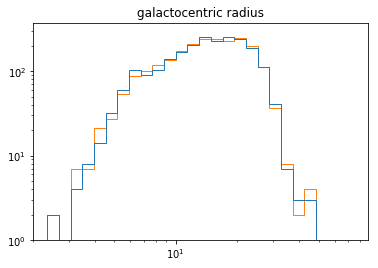

In [47]:
plt.hist(r, bins=np.logspace(-1, 1.8, 50), histtype='step', log=True)
plt.title('galactocentric radius')
plt.xscale('log')
plt.xlim(2, )
plt.ylim(1,)

In [48]:
len(clumpTable)

2268

In [49]:
mpl.rc('font',**{'family':'sans-serif', 'serif':['Computer Modern Serif'], 
             'sans-serif':['Helvetica'], 'size':16, 
             'weight':500, 'variant':'normal'}) 
dataCMD = dataCMD_15
good = (dataCMD['phase'] <3) & (dataCMD['phase'] > -1) & (dataCMD['Gaia_G_DR2Rev'] < 4)
f = interp1d(dataCMD['Gaia_BP_DR2Rev'][good] - dataCMD['Gaia_RP_DR2Rev'][good], dataCMD['Gaia_G_DR2Rev'][good], fill_value='extrapolate')
xx = np.linspace(1, 2.5)

minStarsRGB = 1
maxMagDiff = 2
minRedColor = 1.25
minAngularDistance = 1.0 #deg
minSigPM = 0.5 #mas/yr
index_order = np.argsort(clumpTable['angularSizeR'].values)
#print(index_order[1])
minr = np.min(clumpTable['angularSizeR'])
print('distance, pmra, pmdec, pmraWidth, pmdecWidth, ra, dec, angular distance')
for ii, i in enumerate(range(len(index_order))):
    i = index_order[i]
    nstars = len(clumpTable.loc[i]['ra'])
    ra = clumpTable.loc[i]['ra'][0]
    dec = clumpTable.loc[i]['dec'][0]
    pmra = clumpTable.loc[i]['pmra'][0]
    pmdec = clumpTable.loc[i]['pmdec'][0]
    angular_distance = np.max((clumpTable.loc[i]['angularSizeR'], minAngularDistance))
    distance = clumpTable.loc[i]['distance'][0]
    #print(ra, dec, pmra, pmdec, angular_distance, distance)

    medra = np.median(clumpTable.loc[i]['ra'])
    meddec = np.median(clumpTable.loc[i]['dec'])
    pm2Max = pmra**2 + pmdec**2
    pmramed = np.median(clumpTable.loc[i]['pmra'])
    pmdecmed = np.median(clumpTable.loc[i]['pmdec'])
    pmrasig = np.max((np.sqrt(np.var(clumpTable.iloc[i]['pmra']))*4, minSigPM))
    pmdecsig = np.max((np.sqrt(np.var(clumpTable.iloc[i]['pmdec']))*4, minSigPM))
    maxParallax = 10./distance
    print(distance, pmramed, pmdecmed, pmrasig, pmdecsig, angular_distance)

    
    queryPro = """WITH x AS (SELECT  * FROM gaia_dr2.gaia_source AS gs WHERE q3c_radial_query(gs.ra, gs.dec, {0}, {1}, {2}))
    SELECT x.ra, x.dec, x.pmra, x.pmdec, phot_g_mean_mag, ebv, phot_bp_mean_mag, phot_rp_mean_mag
        FROM x
            WHERE parallax < {3} AND abs(pmra - {4:0.6f}) < {5:0.6f} AND abs(pmdec - {6:0.6f}) < {7:0.6f};""".format(medra, meddec, 
                                                                                                                         angular_distance, 
                                                                                                                         maxParallax, 
                                                                                                                         pmramed, pmrasig,
                                                                                                                         pmdecmed, pmdecsig)
    

    #columns = ['parallax', 'int_average_g', 'ebv', 'phot_bp_mean_mag', 'phot_rp_mean_mag']
    #query = """select {0} from gaia_dr2.gaia_source as gs, gaia_DR2.vari_rrlyrae as rr {1}"""
    #cuts = "WHERE ".format(ra, dec, angular_distance)
    query = ""
    columns = ""
    cuts = ""
    res = queryDatabase(query, columns, cuts, cache_file='rrlyrae_pairs_{0}.pkl'.format(ii), queryPro=queryPro)


    dnow = Table(res)
    Ag, Abp, Arp = getDust(dnow['phot_g_mean_mag'], dnow['phot_bp_mean_mag'], dnow['phot_rp_mean_mag'], dnow['ebv'])
    bprp = (dnow['phot_bp_mean_mag'] - Abp) - (dnow['phot_rp_mean_mag'] - Arp)
    MG = dnow['phot_g_mean_mag'] - Ag - 5.*np.log10(distance*1e3/10)
    
    red = bprp > minRedColor
    notTurnOff =  MG < 4.*bprp + 12
    
    if np.logical_or((np.sum((MG[red & notTurnOff] - f(bprp[red & notTurnOff])) <= maxMagDiff) >= minStarsRGB), len(dnow) < 100) :

        fig, ax = plt.subplots(1, 3, figsize=(15, 5))

        if len(dnow) > 4000:
            HH, xx, yy = np.histogram2d(dnow['ra'], dnow['dec'], bins=100)
            im = ax[0].pcolormesh(xx, yy, HH.T,
              cmap='inferno', norm=mpl.colors.LogNorm())
        else:
            if len(dnow) < 100:
                size = 20
            else:
                size = 3
            ax[0].scatter(dnow['ra'], dnow['dec'], s=10, label=('{0:0.4f},{1:0.4f}'.format(medra, meddec)))
        ax[0].legend()
        ax[0].set_xlabel('ra')
        ax[0].set_ylabel('dec')

        if len(dnow) > 10000:
            xbins = np.linspace(0, 2.5, 50)
            ybins = np.linspace(10, 20, 200)
            HH, xx, yy = np.histogram2d(bprp, dnow['phot_g_mean_mag'] - Ag, bins=(xbins, ybins))
            im = ax[1].pcolormesh(xx, yy, HH.T,
              cmap='inferno', norm=mpl.colors.LogNorm())
            ax[1].invert_yaxis()
            ax[1].set_ylim(20, 10)
        else:
            if len(dnow) < 100:
                size = 20
            else:
                size = 3
            ax[1].scatter(bprp, dnow['phot_g_mean_mag'] - Ag, s=size)
            ax[1].set_xlim(0, 2.5)
            ax[1].set_ylim(20, 10)
        for dataCMD, l, c in zip([dataCMD_10, dataCMD_15, dataCMD_20], ['-1.0', '-1.5', '-2.0'], colors):
            good = (dataCMD['phase'] < 4) & (dataCMD['phase'] > -1)
            ax[1].scatter(dataCMD['Gaia_BP_DR2Rev'][good] - dataCMD['Gaia_RP_DR2Rev'][good], 
                          dataCMD['Gaia_G_DR2Rev'][good] + 5.*np.log10(distance*1e3/10), s=1, alpha=0.1, label='{0} Fe/H'.format(l), c='black')

        #ax[1].scatter(cmd_bprp, cmd_MG + 5.*np.log10(distance*1e3/10), s=3, alpha=0.1)
        ax[0].set_title('{0:0.2f} kpc'.format(distance))
        ax[1].set_xlabel('bp - rp')
        ax[1].set_ylabel('G')
        ax[1].set_title('{0} RRlyrae {1}'.format(nstars, i))

        ax[2].pcolormesh(xe, ye, H.T, cmap='Greys', norm=mpl.colors.LogNorm(), alpha=0.75)
        ax[2].scatter(clumpTable.loc[i]['l'], clumpTable.loc[i]['b'], s=100)
        ax[2].scatter(locGalcGal.l, locGalcGal.b, s=40, facecolor='none', edgecolor='black', label='local galaxies', alpha=0.5, zorder=np.inf)
        ax[2].scatter(gccGal.l, gccGal.b, s=40, facecolor='none', edgecolor='red', label='globular clusters', alpha=0.5, zorder=np.inf)
        ax[2].set_xlabel('l')
        ax[2].set_ylabel('b')
        ax[2].set_xlim(0, 360)
        ax[2].set_ylim(-90, 90)
        vtannow = np.sqrt(pmra**2 + pmdec**2)*4.*distance
        ax[2].set_title('{0:0.2f} km/s'.format(vtannow))
        plt.tight_layout()
        fig.savefig('cmd_rrlyrae_pairs_{0:04d}.png'.format(ii))
        plt.close(fig)

        #plt.gca().invert_yaxis()

/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)
No handles with labels found to put in legend.


distance, pmra, pmdec, pmraWidth, pmdecWidth, ra, dec, angular distance
18.359550961886892 -1.83448822731399 -2.17864666454796 0.5 0.5 1.0


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


6.381265436968355 -8.4684200000491 -17.9637261605969 0.5 0.5 1.0


No handles with labels found to put in legend.


20.389670801244414 0.0520764000865538 -2.83439378656611 0.5 0.5 1.0
6.503434405078669 -6.5454607541427 -11.2321260249682 0.5 0.5 1.0
43.82129397984194 2.3375223223736548 -0.330515339444237 0.5 0.5 1.0
11.901970041399691 -5.494593000223925 -2.556306945694055 0.6637936277505005 0.6064963705637796 1.0


No handles with labels found to put in legend.
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


20.162268999897055 0.0908997222503452 -1.293438210489105 0.5 0.5 1.0
4.668510329411469 -2.41591460250388 -7.77197584140493 1.8724814417783602 0.5 1.0
15.6328084470087 -1.0290010401980065 -2.9911943582511302 0.585301888222814 0.5 1.0
24.165542201666522 -1.7384433649396298 -1.88605533055784 0.5 0.5 1.0
4.129245268810586 -8.165997895935716 -4.192085275649405 0.5 3.9452498976736203 1.0
24.632867483410774 -0.63332577921072 -0.5766614352387149 0.5 0.5 1.0
16.172478798778045 0.7498413016426465 -0.030231094402608797 0.6414621381727139 0.5 1.0
16.923612988671444 0.429839049876431 -2.61878797534505 0.5328819444019921 0.5 1.0


No handles with labels found to put in legend.


8.728005355254213 -5.560164761585336 -7.552120717864245 0.7991279183266595 0.8198190193463795 1.0
9.061684492178664 2.5645534742884752 -3.98416571020892 0.5 0.6683035124363998 1.0
17.323483160211026 0.4461185853080155 -4.114901704460015 0.5 0.5 1.0
23.963782242815157 0.044738907891269206 -2.22020640188487 0.5 0.5 1.0
14.855719265593041 1.0607562295241955 -1.3193742378945998 0.5 0.5731854322779601 1.0


No handles with labels found to put in legend.


12.497751995686409 -3.362706219006935 2.8229950169286697 0.5 0.8117407633502003 1.0
10.743408144544738 -0.06799763240469801 2.12681001042683 0.976735044909268 0.5 1.0
18.703038006519318 -0.717006233528132 -1.17840876922298 0.5 0.5 1.0
17.881050484605737 2.05257817458742 -1.809257719447755 0.5 0.5 1.0
18.39509363107042 1.2824770488021349 -1.989871201115975 0.5 0.5 1.0
20.089349994758905 -1.194833800707665 -1.13164006994853 0.5 0.5 1.0
24.81269702524132 0.427438292140998 -2.27642031849101 0.5 0.5 1.0
19.483498848904695 0.06331756904575475 -2.241788165138865 0.5 0.5 1.0


No handles with labels found to put in legend.


18.126030556668745 -2.9675570987770152 -3.67805572287476 0.5628289698529398 0.5 1.0
27.346173669251307 -0.16823733317213302 -1.6102814316833252 0.5 0.5 1.0
27.09313495860752 -0.960111789883346 -3.58361052646666 0.5 0.5 1.0
23.8239605574035 -0.6249020825992845 -1.3208950267794 0.5 0.5 1.0
7.719464365549403 0.8948847274373025 -7.94186589475518 0.79879778992207 0.5 1.0
19.860986488206425 1.4480735048902051 -0.186404522071136 0.5 0.5 1.0
29.47356051640343 0.1179065096698755 -1.29625407075415 0.5 0.5 1.0
15.782448011409763 -1.673111279285605 0.0274940820609928 0.81580520293726 0.5 1.0


No handles with labels found to put in legend.


10.52389193802239 -4.44908045142403 -4.083693385168164 0.5780378629046794 0.5 1.0
7.8201904494517365 5.610888917466565 -2.0499813980869153 1.1636437408240603 0.5 1.0
16.683072988941273 -1.638166551516155 -2.214226049336705 0.5 0.5 1.0
9.719748563450743 3.750374488301925 -3.81838305923924 1.0929649630856995 0.5 1.0
22.593801275076594 -0.6433382938771945 -0.41914210085739645 0.5 0.5 1.0
16.94873458881826 1.146484495658135 -2.1030672360001397 0.5 0.5 1.0
15.036023544336807 -0.38698545063854 -3.849922966613325 0.622160134516624 0.5 1.0
13.08010931838311 1.459132090665475 -2.7702159700595947 0.7941161076561398 0.5 1.0
19.786032423951553 -0.2195173027175075 -0.6742390363881965 0.5 0.5 1.0
10.852575658926526 -4.28188698501994 -3.84734788414411 0.8891684110914397 0.7461614039979594 1.0
22.28773559286404 0.246846757695749 -0.5581284942988864 0.5 0.5 1.0
24.554710633018097 0.4350328233126825 -1.26391908107614 0.5 0.5 1.0
27.023949552897808 -0.008401817972699052 -1.94224762187082 0.5 0.5 1.0
21.2

No handles with labels found to put in legend.


15.953326828501748 -0.014930045196664507 -1.884829184019105 0.7803066614152341 0.5 1.0
15.345730933830454 -2.4018094486268398 -2.4994845668527104 0.7182770094516799 0.5 1.0
7.490145064534409 3.956225971122155 -2.8115022226320647 0.5 0.5 1.0
20.30783829579362 -1.7031273943622098 -0.771037601913219 0.5 0.5 1.0
31.069983817994128 -0.06720313652353052 -1.46653536447254 0.5 0.5 1.0


No handles with labels found to put in legend.


15.601938085487404 -2.9048142261305596 -2.92781744640647 0.5 0.5 1.0
5.4597013781085835 -8.08582425335258 0.8836563031020905 1.21063313260556 1.215782191185598 1.0
8.03139330336786 -2.219990053813775 2.275906703615695 0.87875341151602 1.1822655787683396 1.0
17.414398772694913 2.18579047370155 -1.7070117916336849 0.5 0.5 1.0
23.880965009702408 -0.1230093972836709 -1.4396289943836251 0.5 0.5 1.0
25.660211492653637 -0.295953158181986 -0.7424114627978085 0.5 0.5 1.0
17.399557628617607 -1.68760329436106 -2.27652674841945 0.5745204528933199 0.5 1.0
13.266356880813793 0.1779630186610465 -4.43168184728158 0.5 0.5 1.0
23.257555656182596 0.769785036091782 1.199374360861 0.6548254139946639 0.5 1.0
19.17413731217276 0.33498323064027447 -0.3965192958285315 0.5 0.555399920208854 1.0
21.660761074271353 -0.017921889392463603 -1.057562377252655 0.5 0.5 1.0
24.944894215569352 0.505476282705249 -2.284061995418995 0.5 0.5 1.0
23.769511046974085 -0.280688653507708 -1.95338945502998 0.5 0.5 1.0
22.952529627

No handles with labels found to put in legend.


9.668700725897121 -4.41444735836097 2.86923235649893 0.5 0.5203794259526804 1.0
9.054461248757455 -1.92843956785086 0.428811127316214 0.5700304104707596 0.5 1.0
24.642243126985726 -1.4987729671284051 -1.0375153550092602 0.5 0.5 1.0
8.187112636853858 1.4990963436484201 3.0889521044760198 1.4844613456771998 1.0434933665437596 1.0
20.45561020479906 -1.74085288410837 -1.0382430951193902 0.5 0.5 1.0
27.376126319584838 -0.7036284506098175 -0.27152285384386854 0.5 0.5 1.0
23.266065493615027 -1.0038361012385675 -0.486496272540289 0.5 0.5 1.0
25.852188251558736 -0.8118939589582825 -1.12714011511915 0.5 0.5 1.0
30.739359729531635 -1.6120729077783649 -0.41655278835348053 0.5 0.5 1.0
17.642039755771478 -0.7164986559855585 -1.4133904249375702 0.5 0.5 1.0
20.623077094125346 -0.7673588451896105 -2.560597155997285 0.5366306808393859 0.5 1.0


/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:680: RuntimeWarning: overflow encountered in multiply
  y = y * x + p[i]
/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:680: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]
No handles with labels found to put in legend.


14.357698140268543 0.9879552804783029 -3.01635532464942 0.5 0.5851523706343995 1.0
20.216951541427022 -4.05897425346489 -1.1149378423598701 0.5 0.5 1.0


No handles with labels found to put in legend.


13.670145437679096 -2.35367554657278 -1.06625420342925 0.5109326079163203 0.5 1.0
31.709575385053125 -0.5040642531745705 -0.40200600276166354 0.5 0.5 1.0
27.50398809995582 0.6037529397605435 1.0599462641808919 0.5 0.5 1.0
22.247332628987355 -0.48377333662259503 -0.817067561013837 0.5 0.5 1.0
20.161125784453848 -1.607768577590305 -1.469399060215635 0.5 0.5 1.0
24.494006532508052 -0.6132324383811716 -1.111882832141605 0.5 0.5 1.0
22.974173940741917 -0.5068875943879245 -0.9007993587025165 0.5 0.5 1.0
29.98723103607817 -0.0584084292029656 -2.151763970318705 0.5 0.5 1.0
15.639296695701997 -1.085194592962222 -1.6233400235737752 0.7795247190899122 0.5 1.0
8.062825094261559 5.18320836776921 1.8188836876685501 0.83748217291404 1.1352896245467599 1.0
6.909201104779481 -13.29422786740785 -6.329729595801085 0.8538286430918021 0.5 1.0
22.995396366994093 -1.609402193989475 -1.6755958448737949 0.5 0.5 1.0
20.76485035005539 -1.79189456043636 -1.70548593019417 0.5 0.5 1.0
26.150577423307418 -0.90172259

No handles with labels found to put in legend.


14.577120790338803 -2.28553880031571 -5.3204520863916 0.5 0.5 1.0
16.48847691949653 0.0658119750023816 -1.94479346464085 0.5 0.8804920684705597 1.0
28.195498795029458 -0.991898022307955 -0.25910471566133697 0.5 0.5 1.0
17.834384988688672 -1.739134785936965 -1.9258254016337548 0.6189447131709 0.5 1.0
11.40803546039904 -2.745610815066255 -0.437219182908823 0.5 0.5 1.0


No handles with labels found to put in legend.


16.084385663230325 -1.50491420515046 -3.861413460165755 0.5 0.5 1.0
14.585144837190906 -1.0566695181950805 1.034955497186268 0.5 0.5 1.0


No handles with labels found to put in legend.


7.8910509258315775 7.41522908713733 2.3713094166660893 2.3784582697396814 10.523715537311922 1.0
17.23888864582075 -0.3960269644312055 -2.6294145710433696 0.5 0.5 1.0
21.38156039666481 0.3253749514286065 -2.65526392156661 0.5 0.5 1.0
31.433698265953105 0.6556192186973355 -1.47423356106622 0.5 0.5 1.0
16.287101798507322 1.512379639328135 -3.503933122677895 0.5767995003939399 0.5 1.0
23.502028416033117 0.6892958795996991 -1.31933317445905 0.5 0.5 1.0
27.719482005573177 -0.149677224001164 0.18115873775624852 0.5 0.5 1.0
18.347799457838413 -2.73354828174972 -1.23934810560149 0.5 0.5 1.0
17.455925379678824 -2.130724657464675 -1.2405997690091102 0.5 0.6456118579400001 1.0


No handles with labels found to put in legend.


8.001793348480074 -2.924106249056655 -4.979735110055355 1.4963901836342597 0.9798028924838604 1.0
20.779546883435344 -0.7250497140814385 -1.431995765044825 0.5332561156123901 0.5 1.0
17.409395941836888 -0.8353141208362765 -3.0338128562095052 0.5 0.5 1.0


No handles with labels found to put in legend.


19.437509622325074 -2.091895409201485 -1.5726510192335201 0.5 0.5 1.0
21.978352129543314 -0.562121073539527 -1.483634453147355 0.5 0.5 1.0
11.904461823613383 -1.85519885190718 1.0978839519961934 0.5 0.7553546133954661 1.0


No handles with labels found to put in legend.


13.825787705188677 -2.16864773031049 -0.9033411779609429 0.5 0.5 1.0
18.959773219690067 1.87768621014217 -0.2589064334796885 0.5 0.5 1.0
11.18450411319291 -6.342821847289034 -2.030627322118195 0.6261765291472603 0.6896805176872602 1.0
17.9633485714804 -1.95648275508759 -0.27616158905078403 0.5 0.5 1.0
10.05869822498054 2.141309135366365 0.8222682744736285 1.0870185158037398 0.5 1.0
21.000619735946053 1.20080198785927 -0.5032260571433345 0.5 0.5 1.0
18.989282283252138 0.581955990465187 0.7891980833545356 0.5 0.5 1.0
11.698397325970378 3.030513912061635 -1.74994981681399 1.17404480342854 0.5 1.0
8.863055641214608 -5.06767170060853 -0.9915394026796475 1.0536277800899612 0.5950529122482098 1.0
22.627859910575683 -0.8467996929232591 -0.459664460758878 0.5 0.5 1.0
16.525208995640096 0.07771212138029338 -2.435186870914205 0.5 0.5 1.0
25.56985986055027 -1.52515469982453 -1.15509313277598 0.5 0.5 1.0
29.939595047140962 -1.0573230429646001 -0.598324041750511 0.5 0.5 1.0
18.554603624605654 0.4380

No handles with labels found to put in legend.


12.018145765302965 -1.99672726329026 -6.445096796546315 0.7594162491513599 0.8712146806959797 1.0
12.075669804064166 1.502522919071165 -4.0990712030397 0.5 0.5 1.0
27.45195674407845 -0.65634915188895 -0.27111727463054347 0.5 0.5 1.0


No handles with labels found to put in legend.


8.507166849284364 -5.25265647861747 -6.220875087000175 0.5 1.183556196173699 1.0
22.02511429834283 -1.0145511633753195 -0.5157702330706675 0.5 0.5 1.0
23.82587624255198 -0.44839693338387754 -2.19487604242678 0.5 0.5 1.0
21.91227564167198 -1.1477488525615551 -2.037410060906765 0.5 0.5 1.0
27.33773900558136 -0.9495516579386125 -0.467816646861817 0.5 0.5 1.0


No handles with labels found to put in legend.


11.520820877848493 -1.22659609715822 -2.87752993115264 0.5726909923581203 1.09553036914504 1.0


No handles with labels found to put in legend.


12.963482959637412 -1.3107130788668848 -3.493203944871465 0.5 0.88827466220794 1.0
21.16471748017561 -1.3756518655616699 -2.496224600633245 0.5 0.5682086407747802 1.0
10.874146374275586 7.10091014952756 -5.442134180700765 0.7605165034685193 0.8219118798907807 1.0
24.020735996427483 -0.502024980019967 -1.547769308396025 0.5 0.5 1.0
19.799133733900398 -1.0207165189808345 -1.2777495519083502 0.5 0.5 1.0
20.632117982665573 -1.1919757886602849 -1.202061933080885 0.5270420333523798 0.5 1.0
18.858873092639676 0.395103119939355 -0.09235339728688746 0.5 0.5 1.0


No handles with labels found to put in legend.


13.959784001292027 -3.18034653410387 -4.46359848767002 0.5 0.5 1.0
7.160682302162576 -1.1101994986047101 -5.84927231588976 0.5 0.5 1.0


No handles with labels found to put in legend.


12.990567267591222 -4.534318254665895 -5.058817475539845 0.7001741776489396 0.7253365475314997 1.0
8.071428385796988 0.309303304485963 -7.620457017317346 0.793974508161896 1.3567605161633 1.0
11.7956664724732 0.6807684155013876 -3.593569387343185 0.7073708118363939 0.6121185862720999 1.0
13.771181705709505 -0.978367537425994 -6.256144115694456 0.5 0.9123604957077003 1.0


No handles with labels found to put in legend.


11.274754044204476 -4.470536973179289 -4.907748214676195 1.0987801876242802 1.4166232891106194 1.0
11.368565539012307 2.04156332373387 -3.541603213717 0.5 0.8646608002032394 1.0
21.939452989632777 -0.7914368381198544 -1.0509645430278551 0.5122143470206699 0.5 1.0
25.19841633760553 -1.3515256744643351 -0.5829185358176805 0.5 0.5 1.0
20.50178793899182 -2.057684607901975 -0.9205858631355726 0.8961172518379397 0.86217389929595 1.0
24.71202024779943 -0.5689152783625551 -0.29647631120538054 0.5 0.5 1.0
13.973168864261917 -0.7900767352852356 0.941995515869791 0.519484978961718 0.5155514772221963 1.0
26.233269318656394 -1.1695976069316099 -2.030703430820485 0.5 0.5 1.0
27.278246169125733 0.9780680960289865 -1.91273663527302 0.5 0.5 1.0
23.608064943348975 -0.11439217902128454 -1.273011412085845 0.5 0.5 1.0
23.611907766341133 0.39450542611061645 -1.048801312562152 0.5 0.5 1.0
20.63854301234853 -1.7536891217590802 -3.719621600303565 0.5 0.5 1.0
28.15269282882122 -0.22063934975246052 -1.0672678689

No handles with labels found to put in legend.


19.29526536287188 -3.696628857062065 -0.5674477622366595 0.5 0.5 1.0
17.22818914857088 1.0267041570141844 -2.1314060388652054 0.5 0.5 1.0
16.403682523978972 -1.14674764810536 -3.367824582320295 0.5 0.5 1.0
7.746763245986913 -8.057770610429234 -6.337395875421095 0.5 0.5602460063466186 1.0
18.3349480753572 0.7219001088916155 -3.430307995335065 0.5 0.5 1.0
10.674810633177321 0.6535512559893619 3.29236843989491 0.5 0.5 1.0
17.438527387868568 -1.25258792745035 -1.67690247361717 0.5 0.5 1.0


No handles with labels found to put in legend.


10.854135216249398 1.71256329630825 -2.792988334519025 0.9038108673143199 0.5 1.0
17.12066409383056 1.611248917042095 -2.694090859997605 0.5527271399491798 0.6541515344890607 1.0
8.988166283185322 3.9811482679211148 -1.274532414016304 1.1641213586615393 1.129187263349144 1.0
9.038376104705952 1.3240376528451765 -4.28283892311271 1.478352780588974 0.7660414835366005 1.0
18.998069663012043 -2.0866016714910502 -2.79586770209773 0.6805017093221997 0.5 1.0
15.037548287247287 1.038816954939435 -4.155224166809165 0.5 0.5 1.0
25.02677296505321 -0.368762163114783 -2.2315608125771 0.5 0.5 1.0
50.42021175342252 -1.326588719892205 -0.03177479097516437 0.5 0.5 1.0
20.574230865456844 0.860575223014479 -0.33139469177370096 0.5 0.5 1.0
14.67983889008073 -0.5596077797944975 -3.2623747748039102 0.5 0.9758989240394795 1.0
14.102367331859655 -2.4115875020605353 -1.133983517012515 0.5 0.5 1.0
17.335273052646176 -2.628296539328455 -1.567969281857875 0.56013640861506 0.5 1.0
22.348230391083767 -1.13527896647

No handles with labels found to put in legend.


8.488666332608885 -6.892622065769119 -5.121853275952625 0.6775019961102 1.9373391084627798 1.0
15.153358002591197 -3.73388821533434 -1.4963252663387299 0.7629523701150003 0.5 1.0
18.901211195474442 -1.9832713899283299 -1.172780019407965 0.5 0.5 1.0


No handles with labels found to put in legend.


15.973796015251793 1.37557976853497 -1.857505445192385 0.5 0.5 1.0
9.536971549018295 -0.12201479452059269 -4.087368935788405 0.5 0.8635156378837001 1.0
25.62097089628063 -1.24969389228304 -1.15212545544245 0.5 0.5 1.0


No handles with labels found to put in legend.


8.196878709651934 -3.7986280032128352 -4.233141327062665 1.8446526026788996 0.5 1.0
12.70456850272779 1.8157531755021599 -2.25130027274409 0.5 0.5 1.0
22.747676584202964 -0.33846876326315145 -0.6855473648829765 0.5 0.5 1.0
27.583677862156076 -0.956474106459512 0.0757100977221815 0.5 0.5 1.0
28.20670741616094 -0.3680175609832025 -1.1306180482359451 0.5 0.5 1.0
16.665192250525976 0.9950540113610356 0.8203837651819006 0.5409544502899382 0.5 1.0
32.07752418836917 -0.9698915260276859 -0.8645898542222925 0.5 0.5 1.0
10.30959182991886 -3.39500284991714 -5.63874511888007 0.5 0.5 1.0
15.65098191080413 -2.0925448384895153 -1.0806618752617645 0.5 0.9275780557794222 1.0
21.83943391707962 -0.736429509811388 -1.1677793058905102 0.5 0.5 1.0
14.339481137523517 -0.0644952817378688 0.06891086017961964 0.5 0.6270208627992054 1.0
11.483570298783215 2.790186327025555 -5.261051914612651 0.5 1.2501368417799608 1.0
18.239824243348647 -2.743376112222645 -1.10346045809307 0.6204273983901398 0.5 1.0
15.719251094

No handles with labels found to put in legend.


23.947471595700133 -0.45516473508054245 0.1384016924022758 0.5 0.5 1.0


No handles with labels found to put in legend.


10.179422638306344 4.86638503149642 1.293358675638645 2.4162783071324796 10.3516394351665 1.0
16.24634678903348 -1.51350673875982 -1.6058941836796001 0.5076606754889603 0.5 1.0
24.156582598012072 -0.8918985602393266 -1.678152705575095 0.5 0.5 1.0
13.21577851783416 2.570892020720465 -1.8568852491110701 0.5 0.7471878187652004 1.0
30.48804978093145 -0.2484947928954485 -1.487279108138615 0.5 0.5 1.0
21.336446565667377 -0.26182853884347 0.17741925050572926 0.5 0.5 1.0
21.628995887720603 -1.46381152990526 -1.9011007847546049 0.52249928403472 0.5 1.0
27.50633984164823 0.009209037667776199 -1.496476518930405 0.5 0.5 1.0
10.82096870689413 -2.58040347257295 -1.0227498222801326 0.5 0.83197585836739 1.0
16.938097969774446 -2.51506082085857 -1.4764356169580601 0.7914830150381604 0.5 1.0
19.696773701114147 -1.26983626556098 0.9950462396103494 0.5 0.5 1.0
18.851764587137254 0.552550979230645 -2.7213825057947147 0.682321111828152 0.5 1.0
6.520943389780523 8.103095725983565 -3.62727833635399 1.84216241

No handles with labels found to put in legend.


12.896001060901927 -2.04369990036519 -3.29445394825319 0.5407621683907604 0.5 1.0
22.08583865699695 0.0028999222750945505 -1.804753335613355 0.5 0.5363585621029401 1.0
23.841323206885043 -1.0695897062716648 -1.156152586050645 0.5 0.5 1.0
24.124554487221666 -1.022025297822105 -0.324265619172694 0.5 0.5 1.0
18.48164436626917 -2.012480236836285 -2.26853313324456 0.5 0.5231063972439198 1.0
8.479496042463703 4.215732955667665 -2.692531597171285 1.2047985948570208 0.8517108274134202 1.0
10.835369388460913 0.26381029599746963 -3.1190252179581153 0.7430169268028695 0.70192856661654 1.0
21.003462991130988 -2.1578748213177352 -2.3680976071627047 0.5 0.5 1.0


No handles with labels found to put in legend.


8.614716838326496 4.2712881613497355 -0.2283994869110575 0.5 1.453824752690406 1.0
10.749093192595 2.19445076726075 -2.505505728585455 0.5 0.5 1.0
6.388763216198481 -3.77829714757292 -6.0851488830408 2.0239493953072394 0.5 1.0
5.042705333366796 4.438712283225485 -11.1848691504253 1.6310049426919786 1.2547312103012018 1.0
19.541282636295154 0.497503858290015 -0.6292733948481185 0.5 0.5 1.0
31.9155772344178 -1.266787068533195 -0.9661345169418665 0.5 0.5 1.0
15.76384988759755 -0.927375084634372 -4.283264875571479 0.5 0.5 1.0


No handles with labels found to put in legend.


8.370716892867534 -3.2848686671674 -1.524410455118685 1.4359356650906 0.5 1.0
12.301111021310255 2.283336283247905 -3.08037531862969 0.8110855106229806 0.5 1.0
7.795522668938155 1.2237362820872848 -4.3312881779685295 0.78567472810334 1.079148493042359 1.0
22.79678124945255 -1.23474458241119 -0.3436456829168745 0.5 0.5 1.0
10.900961593463668 -2.72415155723401 1.502728087243215 0.5 0.5 1.0
22.021824086456988 -0.92082942202446 -3.07360900074791 0.5 0.5 1.0
26.28353629513836 -0.8752626777279845 -0.20188111806589798 0.5 0.5 1.0
22.38266836976969 -1.3737167937881951 -2.28518510541181 0.5 0.6890962494739599 1.0
11.288968770444336 -3.1020673237538 -0.9755604103275299 0.6347780953027602 0.67376244847724 1.0
16.792044890475346 -2.7742082680560554 2.1275541768407 0.5 0.5546576841647197 1.0
17.424669790074635 -1.412540517468495 0.8616214805577425 0.58428106344078 0.5 1.0
10.392181984236341 -7.945697389841705 -1.038901883349845 0.7763390299099395 0.5 1.0
21.67713671981994 0.09737446444125669 -0.697

OperationalError: could not translate host name "cappc127.ast.cam.ac.uk" to address: nodename nor servname provided, or not known


In [ ]:
#figAll, axAll = plt.subplots()
figSky, axSky = plt.subplots(figsize=(15, 10))
colors=iter(plt.cm.rainbow(np.linspace(0,1,len(clumps))))
mpl.rc('font',**{'family':'sans-serif', 'serif':['Computer Modern Serif'], 
             'sans-serif':['Helvetica'], 'size':16, 
             'weight':500, 'variant':'normal'}) 
for j, ci in enumerate(clumps):
    samesies = 0
    for k in range(j):
        same = np.in1d(clumps[j], clumps[k])
        samesies += np.sum(same)
    #if clumps[j] != clumps[j-1]
    if samesies < 1:
        small = treedata.iloc[clumps[j]]
        co = cGalactic[clumps[j]]
        vll = vl[clumps[j]]
        vbb = vb[clumps[j]]
        dist_known_gal = np.zeros(len(co))
        dist_known_gcc = np.zeros(len(co))
        for ii, (ll, bb) in enumerate(zip(co.l, co.b)):
            dist_known_gal[ii] = np.min(np.sqrt((ll - locGalcGal.l)**2 + (bb - locGalcGal.b)**2).value)
            dist_known_gcc[ii] = np.min(np.sqrt((ll - gccGal.l)**2 + (bb - gccGal.b)**2).value)
        dist_known = np.concatenate((dist_known_gal, dist_known_gcc))
        if np.min(dist_known) < 5: 
            continue
        fig, ax = plt.subplots(ncols=4, figsize=(20, 5))
        xx = [co.l, co.b, co.l]
        yy = [co.b, co.distance, co.distance]
        vxx = [vll, vbb, vll]
        vyy = [vbb, np.zeros(len(vbb)), np.zeros(len(vll))]
        #xx = [small.u, small.v, small.w]
        #yy = [small.v, small.w, small.u]
        #vxx = [small.U, small.V, small.W]
        #vyy = [small.V, small.W, small.U]
        lxx = ['l', 'b', 'l']
        lyy = ['b', 'd', 'd']
        color = next(colors)
        for i, (x, y, vx, vy, lx, ly) in enumerate(zip(xx, yy, vxx, vyy, lxx, lyy)):
            ax[i].quiver(x, y, vx, vy, color=color)
            ax[i].set_xlabel(lx)
            ax[i].set_ylabel(ly)
            #axAll.quiver(x, y, vx, vy)
        ax[3].pcolormesh(xe, ye, H.T, cmap='Greys', norm=mpl.colors.LogNorm(), alpha=0.75)
        ax[3].scatter(co.l, co.b, s=40, c=color)
        ax[3].scatter(locGalcGal.l, locGalcGal.b, s=40, facecolor='none', edgecolor='black', label='local galaxies')
        ax[3].scatter(gccGal.l, gccGal.b, s=40, facecolor='none', edgecolor='red', label='globular clusters')
        ax[3].set_xlabel('l')
        ax[3].set_ylabel('b')
        ax[3].set_xlim(0, 360)
        ax[3].set_ylim(-90, 90)
        #ax[3].legend(fontsize=15)
        plt.tight_layout()
        fig.savefig('rrLyrae_kdtree_{0:03d}.png'.format(j))
        plt.close(fig)
        axSky.scatter(cGalactic.l[clumps[j]], cGalactic.b[clumps[j]], s=len(clumps[j])*10, c=color)
        print(clumps[j])
axSky.scatter(locGalcGal.l, locGalcGal.b, s=40, facecolor='none', edgecolor='black')
axSky.scatter(gccGal.l, gccGal.b, s=40, facecolor='none', edgecolor='red')
axSky.set_xlabel('l')
axSky.set_ylabel('b')
axSky.set_xlim(0, 360)
axSky.set_ylim(-90, 90)
#plt.close(fig)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


[49 58]
[51 52]
[55 53]
[54 60]
[57 56]
[249  59]
[104  88]
[ 117 1465]
[1460  123]
[136 159]
[151 144]
[196 199]
[515 207]
[ 215 1516]
[ 217 1525]
[219 218]
[1547  224]
[420 430]
[623 423]
[435 434]
[505 627]
[517 513]
[1534  535]
[549 552]
[601 731]
[602 605]
[610 607]
[416 621]
[638 707]
[9521  649]
[658 654]
[666 657]
[9821  671]
[9798  677]
[9822  682]
[1969  688]
[694 703]
[ 700 5100]
[725 732]
[ 743 1965]
[781 787]
[785 799]
[820 792]
[ 822 9747]
[ 835 1977]
[858 846]
[847 844]
[  853 11548]
[980 856]
[876 882]
[900 878]
[880 894]
[11615   891]
[907 928]
[912 903]
[913 929]
[ 936 1030]
[982 875]
[990 991]
[988 993]
[999 998]
[11683  1000]
[1015 1055]
[11669  1061]
[1088 1091]
[1179 1093]
[1202 1095]
[1101 1103]
[1124 4363]
[1262 1132]
[1194 1133]
[1146 1154]
[1296 1155]
[1165 1178]
[1177 1260]
[1181 1199]
[1236 1182]
[1214 1234]
[1232 1185]
[1247 1235]
[1255 1241]
[1277 1266]
[1304 4336]
[1308 1364]
[1699 1325]
[1586 1333]
[1682 1339]
[1584 1350]
[1359 4490]
[1369 1376]
[1712 13

In [292]:
# ! rm best_candidate_cmd_2deg.pkl

In [ ]:
# Look around the best CMD...
dataCMD = dataCMD_15
good = (dataCMD['phase'] <3) & (dataCMD['phase'] > -1) & (dataCMD['Gaia_G_DR2Rev'] < 4)
f = interp1d(dataCMD['Gaia_BP_DR2Rev'][good] - dataCMD['Gaia_RP_DR2Rev'][good], dataCMD['Gaia_G_DR2Rev'][good], fill_value='extrapolate')
xx = np.linspace(1, 2.5)

queryPro = """WITH x AS (SELECT  * FROM gaia_dr2.gaia_source AS gs WHERE q3c_radial_query(gs.ra, gs.dec, {0}, {1}, {2}))
    SELECT x.ra, x.dec, x.pmra, x.pmdec, phot_g_mean_mag, ebv, phot_bp_mean_mag, phot_rp_mean_mag
        FROM x
            WHERE parallax < {3} AND abs(pmra - {4:0.6f}) < {5:0.6f} AND abs(pmdec - {6:0.6f}) < {7:0.6f};""".format(35, -35., #26.0, -30., 
                                                                                                                         25, 
                                                                                                                         maxParallax, 
                                                                                                                         0., 0.25,
                                                                                                                         -1, 0.25)

query = ""
columns = ""
cuts = ""
res = queryDatabase(query, columns, cuts, cache_file='best_candidate_cmd_2deg.pkl', queryPro=queryPro)

In [ ]:
1/maxParallax

In [ ]:
bestCMD = Table(res)

In [ ]:
np.median(clumpTable.loc[1433]['distance'])

In [ ]:
dataCMD = dataCMD_15
good = (dataCMD['phase'] <3) & (dataCMD['phase'] > -1) & (dataCMD['Gaia_G_DR2Rev'] < 4)
model = dataCMD[good]

Ag, Abp, Arp = getDust(bestCMD['phot_g_mean_mag'], bestCMD['phot_bp_mean_mag'], bestCMD['phot_rp_mean_mag'], bestCMD['ebv'])

fig, axes = plt.subplots(ncols=4, figsize=(15,5))
medDist = np.median(clumpTable.loc[1433]['distance'])


modelG = model['Gaia_G_DR2Rev'] + 5.*np.log10(np.median(medDist)*1e3/10)
modelbprp = model['Gaia_BP_DR2Rev'] - model['Gaia_RP_DR2Rev']
f = interp1d(modelbprp, modelG, fill_value='extrapolate')

databprp = bestCMD['phot_bp_mean_mag']-Abp - bestCMD['phot_rp_mean_mag']+Arp
dataG = bestCMD['phot_g_mean_mag']-Ag
xx = np.linspace(g.min(), g.max(), len(g))
antitight = (np.abs(dataG-f(databprp)) > 1.0) & (dataG < 22) & (databprp > -1)
tight = (np.abs(dataG-f(databprp)) < 0.5) & (dataG < 22) & (databprp > -1)

pmra = bestCMD['pmra'][tight]
pmdec = bestCMD['pmdec'][tight]
delta = 0.5
x=np.linspace(0,70)
axes[0].scatter(pmra, pmdec, s=1)
axes[1].scatter(bestCMD['ra'][tight], bestCMD['dec'][tight], s=1)
#axes[1].plot(x,(-2/3+0.01) * (x) -40/3 )
axes[1].plot(x,(-2/3+0.01) * (x) -40/3 -delta)
axes[1].plot(x,(-2/3+0.01) * (x) -40/3 +delta)

axes[1].grid()
#axes[1].scatter(bestCMD['ra'][antitight], bestCMD['dec'][antitight], s=1, color='red')

axes[2].quiver(bestCMD['ra'][tight], bestCMD['dec'][tight], pmra, pmdec)
for ax in [axes[1], axes[2]]:
    ax.set_xlim(0, 70)
axes[3].scatter(databprp, dataG, alpha=0.1, color='black')
axes[3].scatter(databprp[tight], 
                dataG[tight])
axes[3].scatter(modelbprp, 
                modelG, 
                s=1, alpha=0.5, label='{0} Fe/H'.format(l), c='black')
axes[3].plot(xx, f(xx))
axes[3].invert_yaxis()
fig.savefig('stream1_pos_pm_cmd.pdf')





In [ ]:
line = (-2/3+0.01) * (dec) -40/3
stream = np.abs(((-2/3+0.01)*(bestCMD['ra'])-40/3) - bestCMD['dec']) < delta

In [ ]:
plt.scatter(databprp, dataG, alpha=0.1, color='black')
plt.scatter(databprp[stream], dataG[stream])
plt.scatter(modelbprp, modelG, s=1, alpha=0.5, label='{0} Fe/H'.format(l), c='red')
plt.plot(xx, f(xx))
plt.gca().invert_yaxis()
plt.savefig('stream1_on_v_off_line.pdf')

In [ ]:
#divide gabriel.torrealba.arancibia@gmail.com